In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Cumulant4_fonction import C4_long, C4_court, Cross_time
from DoubleRigidWallOverdampedLangevin3D_cython import RigidWallOverdampedLangevin3D
from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm
# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")

# Model de diffusion dans un canal étroit sans potentiel

Code origine : $\mathrm{\color{red}{Cumulant4\_fonction.py}}$

Auteur : $\mathrm{\color{purple}{Élodie ~MILLAN}}$

Date : 19/11/2021


- $2H_p$ : hauteur du canal;
- $a$ : rayon de la particule;
- $V$ : potentiel où la particule est soumis
- $D_\|(z)$ : coeficient de diffusion selon l'axe parallèle aux murs 
- $D_\perp(z)$ : coeficient de diffusion selon l'axe perpendiculaire aux murs 


In [2]:
def Dpara(z):
    """
    D parallèle en fonction de z.
    Return: une liste de Dpara de meme taille que z.
    """
    return (D_para0*(1-(z/Hs)**2))

def Dperp(z):
    """
    D perpendiculaire en fonction de z.
    Return: une liste de Dperp de meme taille que z.
    """
    return D_perp0*(1-(z/H)**2)

def V(z):
    """
    Potentiel subit par la particule en fonction de z.
    Return: une liste de V de meme taille que z.
    """
    return 0


In [42]:
H = 9e-6
Hs = 10e-6 # Hs > H
a = 1e-6
kBT = 4e-21
beta = 1/kBT
Db = kBT/(6*np.pi*0.001*a)
D_para0 = (H-a)/(2*a) * Db
D_perp0 = (H-a)/(2*a) * Db
dt = 1e-1
Nt = int(1000000)

In [43]:
rngz = (1 / np.sqrt(dt)) * np.random.default_rng().normal(
            0.0, 1, size=Nt
        )

In [48]:
z= [0]
for i in range(1,Nt-1):
    zz = (z[i-1] - D_perp0 * (2*z[i-1]/H**2) * dt + np.sqrt(2 * Dperp(z[i-1])) * rngz[i] * dt)
    
    if zz < -H + a:
        zz = -2 * H -zz +a
    if zz > H -a:
        zz = 2 * H - a - zz
        
    z.append(zz)
    

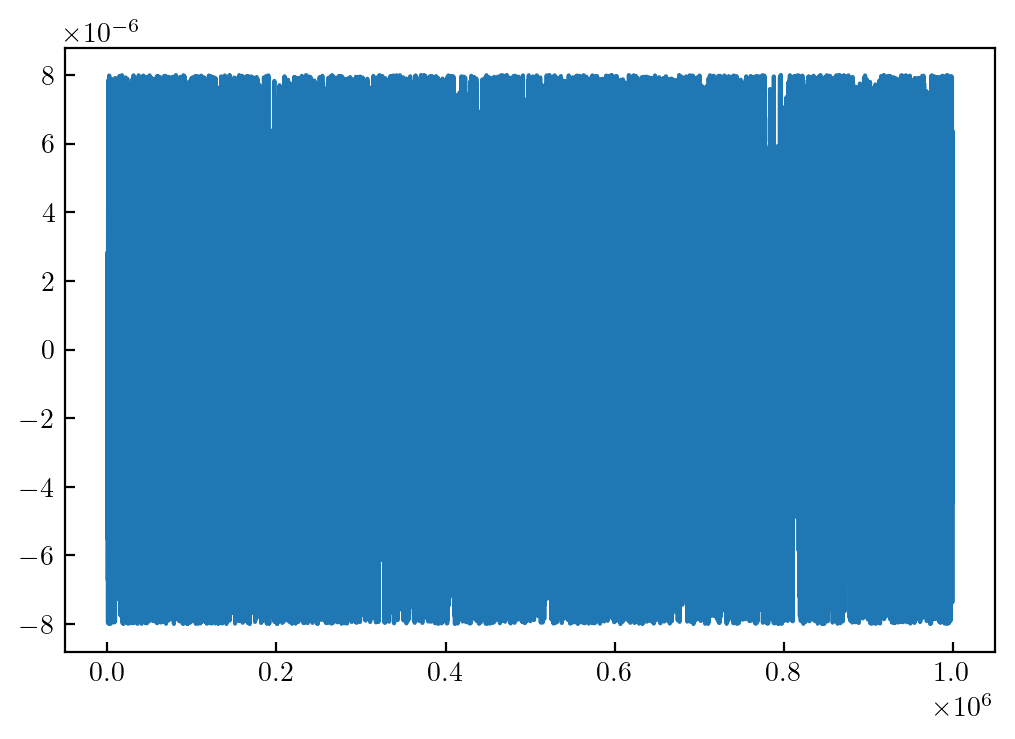

In [49]:
plt.plot(z)

In [22]:
z

array([0, 0, 0, ..., 0, 0, 0])